# NLP_GoingDeeper | E03. Word Embedding Association Test
- 점차 우리의 삶에서 인공지능이 다양한 모습으로 활용되고 있습니다. 
- 인공지능은 음악,뉴스,영화를 추천해주며, 인공지능 기반의 채용 시스템이 도입됩니다. 금융권 및 산업현장에서도 인공지능이 활용됩니다. 
- 이처럼 인공지능이 사람의 의사결정을 돕는 사례가 늘고 있습니다. 
- 그러나 인공지능은 '편향성'의 위험에 노출되어 있습니다. 
    - 아마존 인공지능 채용시스템(남녀차별)
    - 콤파스 범죄자 형량측정 시스템(인종차별)
- 데이터 안에 이미 편향성이 내재된 경우, 이를 통해 도출된 결과도 편향성을 가지게 될 것입니다.
- 인공지능은 데이터를 기반으로 하기 때문에, 데이터가 편향되어있다면, 이를 이용하여 만든 알고리즘 또한 편향될 확률이 매우 높습니다.
- 최근에는 인공지능이 가진 편향성을 예방하기 위한 연구가 지속되고 있습니다. 특히 자연어처리 분야, 그 중에서도 워드 임베딩과 관련된 연구가 많습니다. 
    - 언어의 사용패턴이 담긴 코퍼스에는 인간 무의식 속에 감춰진 편향성이 고스란히 드러나는 데이터셋이기 때문입니다. 
    - 언어의 의미가 워드 임베딩에 추상적 형태로 담겨있는데, 최근 연구를 통해 그 임베딩 공간에서 편향성을 정량적으로 측정하는 방법론들이 발표되면서 이 분야의 연구가 활기를 띠게 되었습니다. 
- 오늘은 워드 임베딩에 숨어 있는 편향성을 측정하는 대표적인 방법론인 Word Embedding Association Test(WEAT)에 대해 알아보고 실습해보겠습니다. 

---

# 1. 워드 임베딩의 편향성
-  2016년에 발표된 'Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings'라는 논문에서, Word Embedding을 2차원으로 차원 축소해서 시각화했을 때, 분명히 젠더 중립적인 단어임에도 불구하고 Programmer, Doctor, Engineer 등의 단어는 남성대명사 He에 가깝게, Homemaker, Nurse, Hairdresser 등의 단어는 여성대명사 She에 가깝게 위치합니다. 
- 이는 우리가 가지고 있을지도 모를 편견이 워드 임베딩 속 벡터들에 고스란히 반영되어 있었다는 것을 보여줍니다. 
- 참고 : [Debiasing Word Embeddings](https://arxiv.org/pdf/1607.06520.pdf)

## WEAT(Word Embedding Association Test)
- 워드 임베딩 벡터들 간에는 의미적인 유사도 거리를 정량적으로 측정할 수 있습니다.
- WEAT는 워드 임베딩에 내포된 편향성을 정량적으로 측정하는 방법으로, 2016년 Aylin Caliskan이 제안했습니다. 
- WEAT 개념의 아이디어는 심리학의 IAT(Implicit Association Test)라는 인지편향성 실험 구조에서 따온 것입니다.
- 참고 : [WEAT 논문](https://arxiv.org/pdf/1608.07187.pdf), [IAT](https://implicit.harvard.edu/implicit/education.html), [Google-Text Embedding Models Contain Bias. Here's Why That Matters](https://developers.googleblog.com/2018/04/text-embedding-models-contain-bias.html)

## WEAT을 통한 편향성 측정
- 우선 두 개의 target 단어 셋 X, Y와 두 개의 attribute 단어 셋 A, B를 정의합니다.
- 단어 셋을 정할 때는 두 개의 target 셋의 크기가 같아야 하고, 두 개의 attribute 셋의 크기가 같아야 합니다.
    - targets : 
        - X set(꽃) : 장미, 튤립, 백합, 데이지
        - Y set(곤충) : 거미, 모기, 파리, 메뚜기
    - attributes :
        - A set(유쾌) : 사랑, 행복, 웃음
        - B set(불쾌) : 재난, 고통, 증오


In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [2]:
target_X = {
    '장미': [4.1, 1.2, -2.4, 0.5, 4.1],
    '튤립': [3.1, 0.5, 3.6, 1.7, 5.8],
    '백합': [2.9, -1.3, 0.4, 1.1, 3.7],
    '데이지': [5.4, 2.5, 4.6, -1.0, 3.6]
}
target_Y = {
    '거미': [-1.5, 0.2, -0.6, -4.6, -5.3],
    '모기': [0.4, 0.7, -1.9, -4.5, -2.9],
    '파리': [0.9, 1.4, -2.3, -3.9, -4.7],
    '메뚜기': [0.7, 0.9, -0.4, -4.1, -3.9]
}
attribute_A = {
    '사랑':[2.8,  4.2, 4.3,  0.3, 5.0],
    '행복':[3.8,  3. , -1.2,  4.4, 4.9],
    '웃음':[3.7, -0.3,  1.2, -2.5, 3.9]
}
attribute_B = {
    '재난': [-0.2, -2.8, -4.7, -4.3, -4.7],
    '고통': [-4.5, -2.1,  -3.8, -3.6, -3.1],
    '증오': [-3.6, -3.3, -3.5,  -3.7, -4.4]
}

In [3]:
X = np.array([v for v in target_X.values()])
Y = np.array([v for v in target_Y.values()])
print(X)
print(Y)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [4]:
A = np.array([v for v in attribute_A.values()])
B = np.array([v for v in attribute_B.values()])
print(A)
print(B)

[[ 2.8  4.2  4.3  0.3  5. ]
 [ 3.8  3.  -1.2  4.4  4.9]
 [ 3.7 -0.3  1.2 -2.5  3.9]]
[[-0.2 -2.8 -4.7 -4.3 -4.7]
 [-4.5 -2.1 -3.8 -3.6 -3.1]
 [-3.6 -3.3 -3.5 -3.7 -4.4]]


In [5]:
def cos_sim(i,j):
    return dot(i,j.T)/(norm(i)*norm(j))

def s(w,A,B):
    c_a = cos_sim(w,A)
    c_b = cos_sim(w,B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B 

print(s(target_X['장미'],A,B))

0.6457646122337399


- WEAT score값이 양수이므로, target_X에 있는 '장미'라는 단어는 attribute_B(불쾌)보다 attribute_A(유쾌)와 더 가깝다는 것을 알 수 있습니다. 
- 위와 반대로 WEAT score가 음수가 나왔으므로, '거미'는 attribute_B와 더 가깝다는 것을 알 수 있습니다.


In [6]:
print(s(target_Y['거미'], A, B))

-0.794002342033094


In [7]:
print(s(X, A, B))
print(round(np.mean(s(X, A, B)), 3))

[0.29551989 0.51723181 0.26499096 0.50924109]
0.397


In [8]:
print(s(Y, A, B))
print(round(np.mean(s(Y, A, B)), 3))

[-0.44713039 -0.28310853 -0.33144878 -0.26030641]
-0.33


In [9]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

1.932


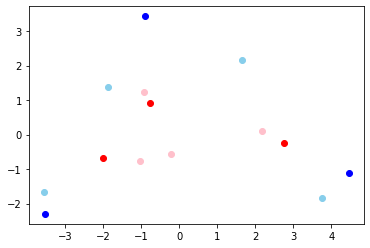

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')

# 2. WEAT 적용
- 실제 pretrain된 임베딩 모델에 WEAT을 적용해봅니다. 
- GoogleNews-vectors-negative300.bin.gz
- w2v를 사용하다가 메모리 부족이 발생할 수 있습니다. 이때는 워드 임베딩 내 300만 개의 단어 중 자주 쓰는 단어 50만 개만 꺼내어 사용하도록 아래와 같이 limit 파라미터값을 주면 메모리 사용량을 크게 줄일 수 있습니다.
- w2v에는 limit으로 지정한 갯수(디폴트는 3,000,000개)의 단어가 있고, 각 단어는 300차원을 갖는다는 것을 알 수 있습니다.
- [Migrating from Gensim 3.x to 4](https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4)


In [11]:
! mkdir -p ~/aiffel/GoingDeeper/DATA/weat
! ln -s ~/data/* ~/aiffel/GoingDeeper/DATA/weat
! cd ~/aiffel/GoingDeeper/DATA/weat
! ls -l

ln: failed to create symbolic link '/aiffel/aiffel/GoingDeeper/DATA/weat/GoogleNews-vectors-negative300.bin': File exists
ln: failed to create symbolic link '/aiffel/aiffel/GoingDeeper/DATA/weat/GoogleNews-vectors-negative300.bin.gz': File exists
total 640
-rw-r--r-- 1 root root  76809 Oct  7 15:03 03_WordEmbedding.ipynb
-rw-r--r-- 1 root root  78818 Oct 19 11:12 E03_WEAT.ipynb
-rw-r--r-- 1 root root 233478 Oct 13 11:44 P03_WEAT-Copy1.ipynb
-rw-r--r-- 1 root root 256240 Oct 13 12:45 P03_WEAT.ipynb


In [12]:
! pip install gensim

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [13]:
import os

data_dir = '~/aiffel/GoingDeeper/DATA/weat' 
model_dir = os.path.join(data_dir, 'GoogleNews-vectors-negative300.bin')

from gensim.models import KeyedVectors

# 50만개의 단어만 활용합니다. 메모리가 충분하다면 limit 파라미터값을 생략하여 300만개를 모두 활용할 수 있습니다. 
w2v = KeyedVectors.load_word2vec_format(model_dir, binary=True, limit=500000)

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [14]:
# print(len(w2v.vocab))   # Gensim 3.X 버전까지는 w2v.vocab을 직접 접근할 수 있습니다. 
print(len(w2v.index_to_key))   # Gensim 4.0부터는 index_to_key를 활용해 vocab size를 알 수 있습니다. 
print(len(w2v['I']))                    # 혹은 단어를 key로 직접 vector를 얻을 수 있습니다. 
print(w2v.vectors.shape)

500000
300
(500000, 300)


In [15]:
w2v['happy']

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

In [16]:
w2v.most_similar(positive=['family'])

[('relatives', 0.6662653088569641),
 ('familiy', 0.6517067551612854),
 ('families', 0.6252894997596741),
 ('siblings', 0.6140849590301514),
 ('friends', 0.6128394603729248),
 ('mother', 0.6065612435340881),
 ('aunt', 0.5811319947242737),
 ('grandparents', 0.5762072205543518),
 ('father', 0.5717043876647949),
 ('Family', 0.5672314763069153)]

In [17]:
w2v.most_similar(positive=['school'])

[('elementary', 0.7868632078170776),
 ('schools', 0.7411909103393555),
 ('elementary_schools', 0.6597153544425964),
 ('kindergarten', 0.6529811024665833),
 ('eighth_grade', 0.6488089561462402),
 ('School', 0.6477997303009033),
 ('teacher', 0.63824063539505),
 ('students', 0.6301522850990295),
 ('classroom', 0.6281620264053345),
 ('Schools', 0.6172096133232117)]

In [18]:
target_X = ['science', 'technology', 'physics', 'chemistry', 'Einstein', 'NASA', 'experiment', 'astronomy']
target_Y = ['poetry', 'art', 'Shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']
attribute_A = ['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
attribute_B = ['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

1.2624874

- 과학과 관련된 단어가 남성과 관련된 단어와 가깝고, 예술과 관련된 단어가 여성과 관련된 단어와 가깝게 나타났습니다
- 사람의 편향성을 실험하는 IAT에서도 이와 같게 나타났었죠? 많은 사람이 가진 편향이 임베딩 모델에 반영되었다고 볼 수 있습니다.

In [19]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_A = ['junk', 'canned', 'convenience', 'frozen', 'fast']
attribute_B = ['health', 'beneficial', 'good', 'nourishing', 'nutritious']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

1.6909266

- 모델도 우리의 예상과 맞는 방향으로 상당히 높은 수치를 보이는 것을 확인했습니다. 인스턴트 식품의 예시와 인스턴트를 의미하는 단어가 가까운 것은 당연합니다. 이 경우 모델이 편향되어있다기보다 단어의 의미를 잘 파악했다고 볼 수 있습니다

In [20]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_A = ['book', 'essay', 'dictionary', 'magazine', 'novel']
attribute_B = ['news', 'report', 'statement', 'broadcast', 'word']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

-0.05137869

- 0에 굉장히 가까운 결과를 보였습니다. 즉, 임베딩 모델이 판단하기에 어느 것끼리 가깝다고 말할 수 없는 것입니다.

In [21]:
target_X = ['mountain','camping','climbing','backpack','rock']
target_Y = ['home','cartoon','bed','drama','pajama']
attribute_A = ['excercise','extreme','outdoor']
attribute_B = ['indoor','static','sleep']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

0.78706217

In [22]:
#메모리를 다시 비워줍시다.
del w2v
print("삭제 완료")

삭제 완료


# 3. 직접만든 Word Embedding에 WEAT 적용
- 형태소 분석기를 이용하여 품사가 명사인 경우, 해당 단어를 추출하기
- 추출된 결과로 embedding model 만들기
- TF/IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기
- embedding model과 단어 셋으로 WEAT score 구해보기

## 3-1. 형태소 형태소 분석기를 이용하여 품사가 명사인 경우, 해당 단어를 추출하기
- synopsis.txt(대략 17MB)에는 2001년부터 2019년 8월까지 제작된 영화들의 시놉시스 정보가 있습니다.

In [23]:
! wget https://aiffelstaticprd.blob.core.windows.net/media/documents/synopsis.zip
! mv synopsis.zip ~/aiffel/GoingDeeper/DATA/weat
! cd ~/aiffel/GoingDeeper/DATA/weat && unzip synopsis.zip

--2021-10-19 11:12:40--  https://aiffelstaticprd.blob.core.windows.net/media/documents/synopsis.zip
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
Connecting to aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18399462 (18M) [application/x-zip-compressed]
Saving to: ‘synopsis.zip’

synopsis.zip        100%[===================>]  17.55M  5.63MB/s    in 3.3s    

2021-10-19 11:12:44 (5.38 MB/s) - ‘synopsis.zip’ saved [18399462/18399462]

Archive:  synopsis.zip
replace synopsis.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [24]:
! pip install konlpy

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [25]:
import os

with open(os.getenv('HOME')+'/aiffel/GoingDeeper/DATA/weat/synopsis.txt','r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [26]:
#- 약 15분 소요
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/GoingDeeper/DATA/weat/synopsis.txt','r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]: #- "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0]) #- 명사일 때만 tokenized 에 저장하게 됩니다.
            tokenized.append(res)

In [27]:
print(len(tokenized))

3168454


## 2. 추출된 결과로 embedding model 만들기


In [28]:
from gensim.models import Word2Vec


#- tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
model.wv.most_similar(positive=['영화'])


# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

[('이야기', 0.5942434072494507),
 ('작품', 0.5536774396896362),
 ('이미지', 0.5325564742088318),
 ('영화로', 0.5305261611938477),
 ('사운드', 0.5205115079879761),
 ('우리', 0.519821047782898),
 ('왜곡', 0.5119555592536926),
 ('주제', 0.5074211955070496),
 ('내레이션', 0.5059033036231995),
 ('코믹', 0.503296434879303)]

In [29]:
model.wv.most_similar(positive=['사랑'])

[('그녀', 0.6234075427055359),
 ('자신', 0.6219351291656494),
 ('그', 0.6061909198760986),
 ('것', 0.5699303150177002),
 ('구릉', 0.5586497187614441),
 ('마음', 0.5546692609786987),
 ('시작', 0.5419847965240479),
 ('수', 0.5416826009750366),
 ('꺄오', 0.539901852607727),
 ('친구', 0.5278078317642212)]

In [30]:
model.wv.most_similar(positive=['절망'])

[('슬픔', 0.549377977848053),
 ('자책', 0.5064576268196106),
 ('좌절', 0.4983188807964325),
 ('자괴', 0.4872782528400421),
 ('분노', 0.4590596854686737),
 ('성취', 0.44918397068977356),
 ('고통', 0.43616387248039246),
 ('감정', 0.42851999402046204),
 ('친밀', 0.42670968174934387),
 ('허탈', 0.42191803455352783)]

In [31]:
model.wv.most_similar(positive=['죽음'])

[('애도', 0.48701849579811096),
 ('비밀', 0.4329428970813751),
 ('고통', 0.4094519317150116),
 ('석조', 0.4038485884666443),
 ('환영', 0.38945648074150085),
 ('혼란', 0.38831281661987305),
 ('죽', 0.38132140040397644),
 ('복수심', 0.3785218596458435),
 ('움트', 0.3754083812236786),
 ('마구잡이', 0.3739812672138214)]

## 3. TF-IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기
- WEAT score를 구할 때 단어 셋을 만들어주어야 합니다.
-  두 축을 영화 장르, 영화 구분 정보를 이용합니다. 이때 영화 구분 정보란 일반영화, 예술영화, 독립영화로 구분된 정보입니다. KOBIS에서 제공한 정보를 기준으로 분류합니다.

- 영화 구분
    - synopsis_art.txt : 예술영화
    - synopsis_gen.txt : 일반영화(상업영화)
    - 그 외는 독립영화 등으로 분류됩니다.

- 장르 구분
    - synopsis_SF.txt: SF
    - synopsis_가족.txt: 가족
    - synopsis_공연.txt: 공연
    - synopsis_공포(호러).txt: 공포(호러)
    - synopsis_기타.txt: 기타
    - synopsis_다큐멘터리.txt: 다큐멘터리
    - synopsis_드라마.txt: 드라마
    - synopsis_멜로로맨스.txt: 멜로로맨스
    - synopsis_뮤지컬.txt: 뮤지컬
    - synopsis_미스터리.txt: 미스터리
    - synopsis_범죄.txt: 범죄
    - synopsis_사극.txt: 사극
    - synopsis_서부극(웨스턴).txt: 서부극(웨스턴)
    - synopsis_성인물(에로).txt: 성인물(에로)
    - synopsis_스릴러.txt: 스릴러
    - synopsis_애니메이션.txt: 애니메이션
    - synopsis_액션.txt: 액션
    - synopsis_어드벤처.txt: 어드벤처
    - synopsis_전쟁.txt: 전쟁
    - synopsis_코미디.txt: 코미디
    - synopsis_판타지.txt: 판타지    

- 예술영화와 일반영화(상업영화)라는 영화구분을 target으로 삼고, 드라마 장르와 액션 장르라는 장르구분을 attribute으로 삼아 WEAT score를 계산해봅니다. 
- 드라마 장르에는 예술문화적 성격이 가능하고, 액션 장르에는 일반(상업)영화적 성격이 강할 것이라는 편향성이 워드 임베딩 상에 얼마나 나타나고 있는지를 측정합니다. 
- WEAT 계산을 위해서는 총 4개의 단어 셋 X,Y,A,B가 필요합니다.
- 예를 들면 예술영화라는 개념을 가장 잘 대표하는 단어들을 art_txt를 처리해서 만든 art라는 단어 리스트에서부터 골라내야 합니다. 
- 이번 경우에는 예술영화, 일반영화라는 영화 구분별로 시놉시스를 모아 데이터를 구성기 떄문에 예술영화를 잘 대표하는 단어란 예술영화 시놉시스에는 자주 나타나지만 그 외 다른 구분의 영화(예를 들어 일반영화) 시놉시스에는 자주 나타나지 않는 것을 고르는 것이 적당할 것입니다. 
- 이런 것과 비슷한 개념의 단어 분석 방식 중, TF-ID가 있습니다. 코퍼스에서 자주 나타나는(TF가 높은) 단어이지만, 다른 코퍼스에까지 두루 걸쳐 나오지는 않는(IDF가 높은) 단어를 선정하고 싶은 것입니다. 

In [32]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/GoingDeeper/DATA/weat/'+file_name,'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]: #, "Adjective", "Verb"]:
                    result.append((word[0]))
    
    return ' '.join(result)

In [33]:
#- 약 10분 소요
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [34]:
#- TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art,gen])

print(X.shape)

(2, 41082)


In [35]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [36]:
m1 = X[0].tocoo() #- # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i,j] for i,j in zip(m1.col, m1.data)]
w2 = [[i,j] for i,j in zip(m2.col, m2.data)]

w1.sort(key=lambda x:x[1], reverse=True) #- art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x:x[1], reverse=True) #- gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')
    
print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')  

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

- 두 개념을 대표하는 단어를 TF-IDF가 높은 순으로 추출하고 싶었는데, 양쪽에 중복된 단어가 너무 많습니다.
- 두 개념축이 대조되도록 대표하는 단어 셋을 만들고 싶기 때문에 단어가 서로 중복되지 않게 단어셋을 추출해야 합니다.
- 우선 상위 100개의 단어들 중 중복되는 단어를 제외하고 상위 n(=15)개의 단어를 추출합니다.

In [37]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])
    
#- w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어 15개를추출합니다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [38]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [39]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


- 이번에는 장르별 대표 단어를 추출해 봅니다.
- 이번에는 드라마 장르와 액션 장르를 다루어 보려고 합니다. 
- 그러나 드라마와 액션 단 2개의 장르만 고려하기보다는 여러 장르의 코퍼스를 두루 고려하는 것이 특정 장르를 대표하는 단어를 선택하는 데 더 유리할 것입니다. 
- 주요 장르 5개만 고려해 봅시다.

In [40]:
genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']

In [41]:
#- 약 10분 소요
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.


In [42]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(6, 33151)


In [43]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
    
    
attributes = []

for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print('\n')
    print()

드라마: 자신, 영화제, 그녀, 사람, 사랑, 위해, 영화, 시작, 국제, 남자, 친구, 이야기, 여자, 아버지, 엄마, 


멜로로맨스: 그녀, 사랑, 자신, 시작, 남자, 남편, 여자, 사람, 친구, 위해, 마음, 섹스, 결혼, 서로, 아내, 


액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 친구, 모든, 목숨, 사실, 세계, 가족, 


코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 


전쟁: 전쟁, 위해, 전투, 시작, 작전, 독일군, 부대, 독일, 윈터스, 자신, 사람, 공격, 임무, 연합군, 병사, 


공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 남자, 가족, 영화, 하나, 




-  중복된 것이 종종 있지만 art, gen 두 개의 단어 셋을 추출했을 때에 비해 적습니다.

## 4. embedding model과 단어 셋으로 WEAT score 구해보기
- traget_X는 art, target_Y는 gen, attribute_A는 '드라마', attribute_B는 '액션' 과 같이 정해줄 수 있습니다.
- target_X 는 art, target_Y 는 gen으로 고정하고 attribute_A, attribute_B를 바꿔가면서 구해봅니다.
- 구한 결과를 21x21 매트릭스 형태로 표현해서 matrix 라는 변수에 담아봅니다.


In [44]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B#, c_a, c_b

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [45]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [46]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
  
    
        matrix[i][j] = weat_score(X, Y, A, B)

In [47]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 0.8 or matrix[i][j] < -0.8:
            print(genre_name[i], genre_name[j],matrix[i][j])

- WEAT score가 0.8 이상, -0.8 이하의 경우만 해석해 보면 아래와 같습니다.

- 예술영화와 일반영화, 그리고 드라마와 멜로로맨스의 WEAT score의 의미를 해석해보면 예술영화는 멜로로맨스, 일반영화는 드라마와 가깝다고 볼 수 있습니다. 부호가 마이너스이므로 사람의 편향과 반대라는 것을 알 수 있습니다.
- 예술영화와 일반영화, 그리고 멜로로맨스와 코미디의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 코디미는 일반 영화와 가깝다고 볼 수 있습니다.
- 예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 전쟁은 일반 영화와 가깝다고 볼 수 있습니다.


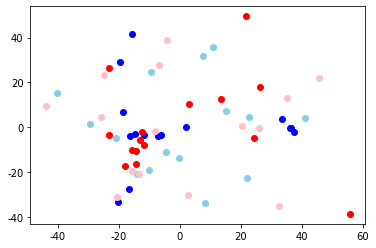

In [48]:
# PCA를 통해 5차원 벡터->2차원 벡터로 줄여 시각화

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots()
ax.scatter(pc_A[:,0], pc_A[:, 1], c='blue', label='A')
ax.scatter(pc_B[:,0], pc_B[:, 1], c='red', label='B')
ax.scatter(pc_X[:,0], pc_X[:, 1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0], pc_Y[:, 1], c='pink', label='Y')

<AxesSubplot:>

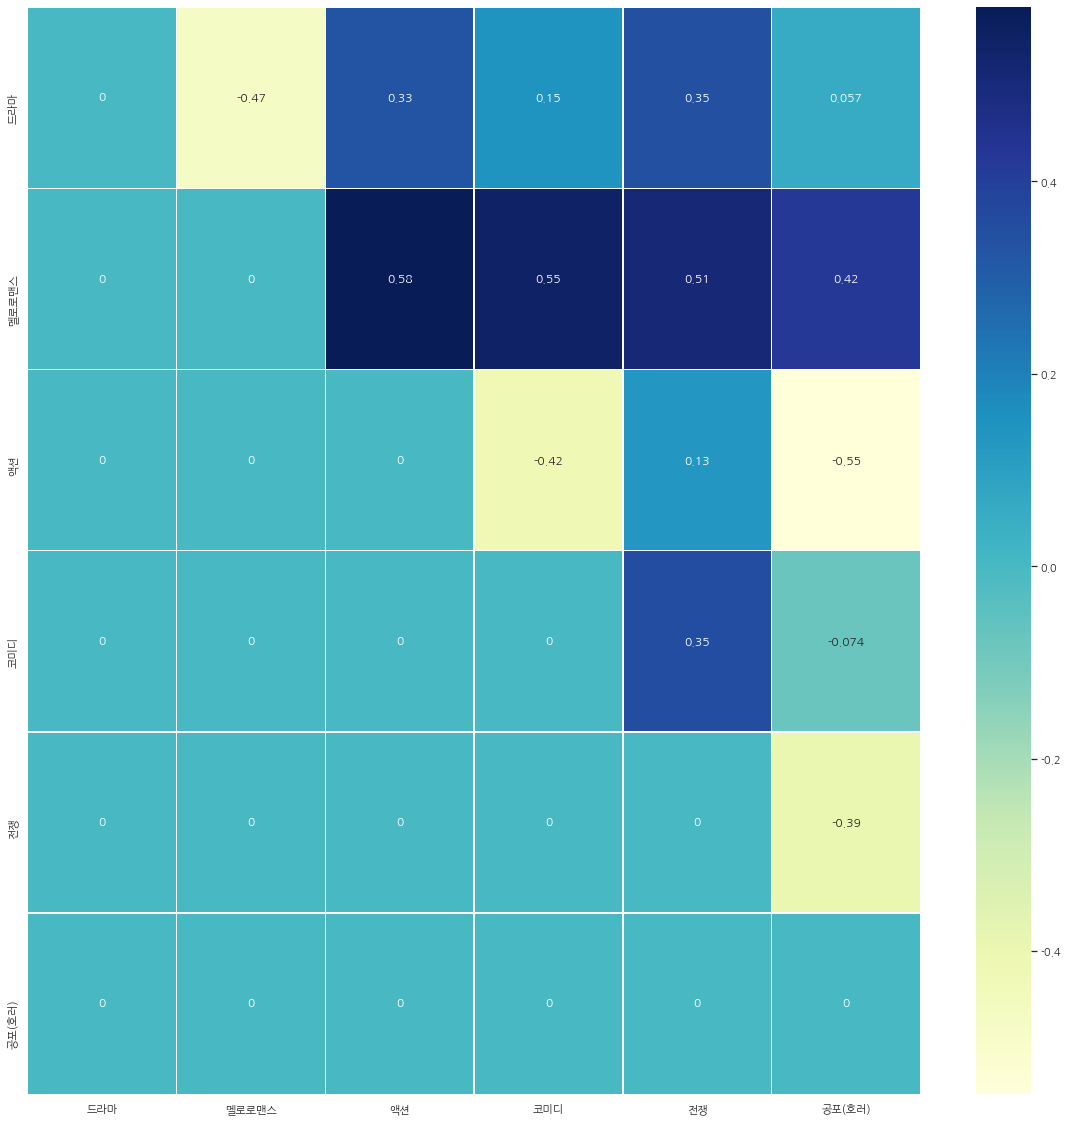

In [49]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

np.random.seed(0)

# 한글 지원 폰트

plt.figure(figsize=(20, 20))
sns.set(font="NanumGothic")

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, linewidths=.5, annot=True, cmap="YlGnBu")
ax